<a href="https://colab.research.google.com/github/HGeorgeWilliams/data/blob/master/SNAdataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stakeholder Data Analysis**
This Notebook visualizes the roles (in the RACI framework) and influence scores of the various stakeholders in Sierra Leone's energy sector. These scores have already been computed, using the transformation described in this [Colab Notebook](https://colab.research.google.com/drive/1EpbzKL0T6dY-UhrmuUVYNOvwqmORLeuc?usp=sharing) hosted on [GitHub](https://github.com/).

# **Initialize packages**
Import packages that this Notebook requires to run.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import math as m

# **Import data**
Import sheets holding data from the excel file holding them and save as pandas dataframes.

In [0]:
with pd.ExcelFile('/content/drive/My Drive/PythonCodes/SNAfinal.xlsx') as xls:
    Inception = pd.read_excel(xls, 'Inception_Sort') # Inception phase data
    Planning = pd.read_excel(xls, 'Planning_Sort') # Planning phase data
    Implementation = pd.read_excel(xls, 'Implementation_Sort') # Implementation phase data
    Operation=pd.read_excel(xls,'Operation_Sort') # Operation phase data
    Output=pd.read_excel(xls,'Output') # Overall project decision making data
    Output2=pd.read_excel(xls,'Output2') # Overall project decision making data (condensed)

DataTables=[Operation,Implementation,Planning,Inception,Output]
Titles=['Operation','Implementation','Planning','Inception','Overall']


# **Convert to percentages**
Convert frequency of mention of each stakeholder to percentages. 

In [0]:
Inception['Count']=Inception['Count']/16*100
Planning['Count']=Planning['Count']/16*100
Implementation['Count']=Implementation['Count']/16*100
Operation['Count']=Operation['Count']/16*100

# **Produce plots**
Plot absolute importance of stakeholders (red bar chart) and the number of times there were identified to be involved in each stage of a typical energy project (blue bar charts). 

Text(0, 0.5, 'Overall')

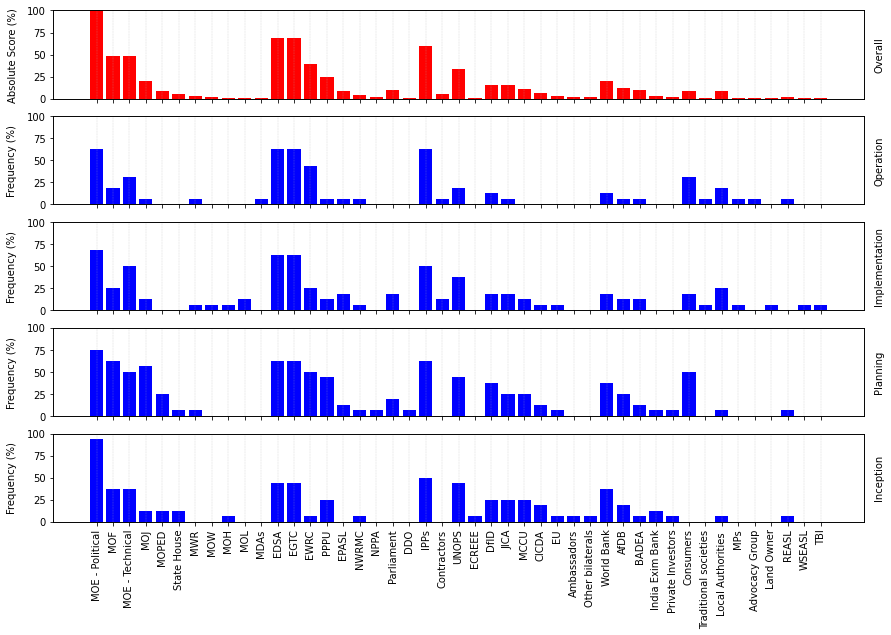

In [0]:
f,ax=plt.subplots(5,1,sharex=True,sharey=True,figsize=(12.8,10))
plt.subplots_adjust(bottom=0.17,left=0.05,right=0.93)
Q=range(1,5)
                  
for index in range(4):
    
    item=ax[Q[index]]
    TickPosition=[x+1 for x in range(len(DataTables[index]['Stakeholder']))];
    
    item.bar(TickPosition,DataTables[index]['Count'],
             align='center',color='blue')
    item.set_xticks(TickPosition)
    item.set_xticklabels(DataTables[index]['Stakeholder'],rotation=90)
    item.grid(True,'major','x',linestyle='-.',linewidth=0.25)
    item.set_ylabel('Frequency (%)',fontweight='normal',labelpad=10)
    item.set_ylim([0,100])
    item2=item.twinx()
    item2.set_yticks([]) 
    item2.set_ylabel(Titles[index],fontweight='normal',labelpad=10)

index=4
item=ax[0]
TickPosition=[x+1 for x in range(len(DataTables[index]['Stakeholder']))];

item.bar(TickPosition,DataTables[index]['Normalised Score'],
         align='center',color='red')
item.set_xticks(TickPosition)
item.set_xticklabels(DataTables[index]['Stakeholder'],rotation=90)
item.grid(True,'major','x',linestyle='-.',linewidth=0.25)
item.set_ylabel('Absolute Score (%)',fontweight='normal',labelpad=10)
item.set_ylim([0,100])
item2=item.twinx()
item2.set_yticks([]) 
item2.set_ylabel(Titles[index],fontweight='normal',labelpad=10)

# **Plot RACI matrix**
Visualize position of stakeholders in the RACI matrix. Please note that some stakeholders have been merged, to decongest the plot. 

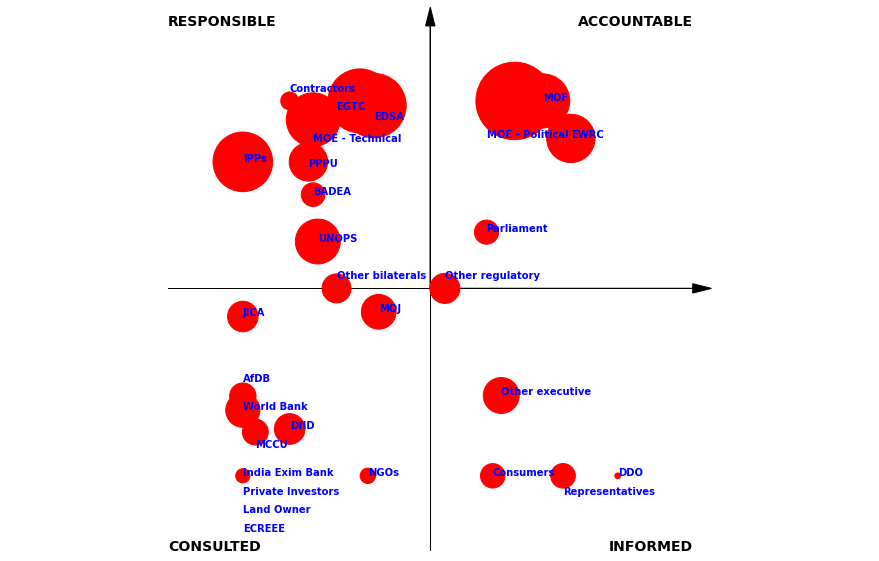

In [0]:
font_size=14
font_weight='bold'
max_val=1.4
f,item=plt.subplots(1,1,figsize=(15.5,10))
item.set_frame_on(False)
item.scatter(Output2['X'],Output2['Y'],color='red',
             s=60*Output2['Normalised Score'],zorder=10) 
item.plot([0,0],[-max_val,0],linewidth=1,color='k',zorder=0)  
item.plot([-max_val,0],[0,0],linewidth=1,color='k',zorder=0) 
item.arrow(0,0,0,max_val,linewidth=1,head_width=0.05, 
           head_length=0.1, fc='k', ec='k')
item.arrow(0,0,max_val,0,linewidth=1,head_width=0.05, 
           head_length=0.1, fc='k', ec='k')
item.axis('equal')
item.set_xticks([])
item.set_yticks([])
item.set_ylim([-max_val,max_val+0.1])
item.set_xlim([-max_val,max_val+0.1])

item.text(max_val,max_val,'ACCOUNTABLE',fontweight=font_weight,
          fontsize=font_size,color='k',ha='right')
item.text(-max_val,max_val,'RESPONSIBLE',fontweight=font_weight,
          fontsize=font_size,color='k')
item.text(-max_val,-max_val,'CONSULTED',fontweight=font_weight,
          fontsize=font_size,color='k')
item.text(max_val,-max_val,'INFORMED',fontweight=font_weight,
          fontsize=font_size,color='k',ha='right')

for i in range(Output2.shape[0]):
    
    item.text(Output2.loc[i,'X1'],Output2.loc[i,'Y1'],Output2.loc[i,
      'Stakeholder'],fontsize=10,color='b',fontweight=font_weight,zorder=20)